### Cel analizy: 
Zaprezentowanie przykładowego procesu analizy z wykorzystaniem środowiska języka Python. Tematyka dotyczy modelowania predykcyjnego na zbiorze danych dotyczących win portugalskich

W pierwszym kroku importowane są biblioteki potrzebne do przeprowadzenia analizy:
- NumPy - biblioteka stanowiąca podstawę obliczeń numerycznych na zbiorach tablicowych
- Matplotlib - bliblioteka pomocna w wizualizacji danych
- Seaborn - biblioteka ukierunkowana na wizualizację danych w zastosowaniach statystycznej analizy danych
- Scikit learn (sklearn) - podstawowa biblioteka obsługująca procesy modelowania machine learning
- Pandas - podstawowa biblioteka do preprocessingu w analizie danych

### Import danych 
Import z pliku *csv za pomocą polecenia read_csv() z binlioteki Pandas. 

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import pandas as pd

ImportError: No module named 'numpy'

In [2]:
wina = pd.read_csv('winequality-all.csv', comment='#')

NameError: name 'pd' is not defined

In [1]:
wina.head()

NameError: name 'wina' is not defined

### Podstawowe statystyki dotyczące zbioru z danymi

In [10]:
wina.describe()

fixed.acidity  volatile.acidity  citric.acid  residual.sugar  \
count    5320.000000       5320.000000  5320.000000     5320.000000   
mean        7.215179          0.344130     0.318494        5.048477   
std         1.319671          0.168248     0.147157        4.500180   
min         3.800000          0.080000     0.000000        0.600000   
25%         6.400000          0.230000     0.240000        1.800000   
50%         7.000000          0.300000     0.310000        2.700000   
75%         7.700000          0.410000     0.400000        7.500000   
max        15.900000          1.580000     1.660000       65.800000   

         chlorides  free.sulfur.dioxide  total.sulfur.dioxide      density  \
count  5320.000000          5320.000000           5320.000000  5320.000000   
mean      0.056690            30.036654            114.109023     0.994535   
std       0.036863            17.805045             56.774223     0.002966   
min       0.009000             1.000000              6.000000     0.987110   
25%       0.038000            16.000000             74.000000     0.992200   
50%       0.047000            28.000000            116.000000     0.994650   
75%       0.066000            41.000000            153.250000     0.996770   
max       0.611000           289.000000            440.000000     1.038980   

                pH    sulphates      alcohol     response  
count  5320.000000  5320.000000  5320.000000  5320.000000  
mean      3.224664     0.533357    10.549241     3.795677  
std       0.160379     0.149743     1.185933     0.879772  
min       2.720000     0.220000     8.000000     1.000000  
25%       3.110000     0.430000     9.500000     3.000000  
50%       3.210000     0.510000    10.400000     4.000000  
75%       3.330000     0.600000    11.400000     4.000000  
max       4.010000     2.000000    14.900000     7.000000

### Zmienimy typ danych dla zmiannej "color" 

In [11]:
wina.color.dtype     # obiekty Pythona

dtype('O')

In [12]:
# konwersja na typ kategorialny

wina.color = wina.color.astype('category')

In [13]:
wina.color.dtype

category

### Ile wierszy i kolumn ma nasz zbiór?
Możemy jeszcze spawdzić wymiary tabeli (DataFrame)

In [16]:
wina.shape

(5320, 13)

### Wylistujmy nasze zmienne (jakie kolumny?)

In [15]:
print(wina.columns.str.cat(sep=',')) # nazwy kolumn (zmiennych)

fixed.acidity,volatile.acidity,citric.acid,residual.sugar,chlorides,free.sulfur.dioxide,total.sulfur.dioxide,density,pH,sulphates,alcohol,response,color


### Fukus na peirwsze 11 kolumn (zmienne nizależne) 
Pierwszych 11 zmiennych jest typu numerycznego. 
- Za pomocą metody **iloc** dokonujemy selekcji wszystkich wierszy i pierwszych jedenaście kolumn.
- Metodę **describe** użyliśmy wcześniej
- zaokrąglamy dane i dokonujemy transpozycji (T)

In [17]:
wina.iloc[:, 0:11].describe().round(1).T.iloc[:,1:]

mean   std  min   25%    50%    75%    max
fixed.acidity           7.2   1.3  3.8   6.4    7.0    7.7   15.9
volatile.acidity        0.3   0.2  0.1   0.2    0.3    0.4    1.6
citric.acid             0.3   0.1  0.0   0.2    0.3    0.4    1.7
residual.sugar          5.0   4.5  0.6   1.8    2.7    7.5   65.8
chlorides               0.1   0.0  0.0   0.0    0.0    0.1    0.6
free.sulfur.dioxide    30.0  17.8  1.0  16.0   28.0   41.0  289.0
total.sulfur.dioxide  114.1  56.8  6.0  74.0  116.0  153.2  440.0
density                 1.0   0.0  1.0   1.0    1.0    1.0    1.0
pH                      3.2   0.2  2.7   3.1    3.2    3.3    4.0
sulphates               0.5   0.1  0.2   0.4    0.5    0.6    2.0
alcohol                10.5   1.2  8.0   9.5   10.4   11.4   14.9

In [18]:
wina.head()

fixed.acidity  volatile.acidity  citric.acid  residual.sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.66         0.00             1.8      0.075   

   free.sulfur.dioxide  total.sulfur.dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 13.0                  40.0   0.9978  3.51       0.56   

   alcohol  response color  
0      9.4         3   red  
1      9.8         3   red  
2      9.8         3   red  
3      9.8         4   red  
4      9.4         3   red

### Ile jest próbek danych dotyczących różnych kolorów win 

In [19]:
wina.color.value_counts()

white    3961
red      1359
Name: color, dtype: int64

### Ograniczamy zakres analizy do win białych

In [20]:
wina_b = wina[wina.color == 'white']
wina_b = wina_b.iloc[:, 0:11]
wina_b.shape

(3961, 11)

### Wyznaczenie zmiennych niezależnych i zm. zależnej do analizy regresji
Dalej, interesuje nas wyznaczenie modelu regresji dla kolumny alcohol. Utworzymy macierz obserwacji oraz wektor zmiennej odpowiedzi.

In [21]:
y = wina_b.iloc[:, -1]  # czyli zmienna zależna alcohol
y.head()

1359     8.8
1360     9.5
1361    10.1
1362     9.9
1363     9.6
Name: alcohol, dtype: float64

In [22]:
x = wina_b.iloc[:, :-1]  # zmienne niezależne (cały zbiór bez ostatniej kolumny)
x.head()

fixed.acidity  volatile.acidity  citric.acid  residual.sugar  chlorides  \
1359            7.0              0.27         0.36            20.7      0.045   
1360            6.3              0.30         0.34             1.6      0.049   
1361            8.1              0.28         0.40             6.9      0.050   
1362            7.2              0.23         0.32             8.5      0.058   
1363            6.2              0.32         0.16             7.0      0.045   

      free.sulfur.dioxide  total.sulfur.dioxide  density    pH  sulphates  
1359                 45.0                 170.0   1.0010  3.00       0.45  
1360                 14.0                 132.0   0.9940  3.30       0.49  
1361                 30.0                  97.0   0.9951  3.26       0.44  
1362                 47.0                 186.0   0.9956  3.19       0.40  
1363                 30.0                 136.0   0.9949  3.18       0.47

### Jakie są zależności między zmiennymi
Chcemy się dowiedzieć, czy alkohol koreluje (jest funkcją) pozostałych 10 zmiennych, a jeśli tak, to jakiej jest postaci. 

Interesuje nas tutaj współczynnik korelacji Pearsona między parami x i y. 

Obliczamy zatem ten współczynnik dla wszystkich par zmiennych ilościowych dla win białych (zmienna objaśniana = white).

In [25]:
korelacja = wina_b.corr('pearson')
korelacja

fixed.acidity  volatile.acidity  citric.acid  \
fixed.acidity              1.000000         -0.019214     0.298959   
volatile.acidity          -0.019214          1.000000    -0.163228   
citric.acid                0.298959         -0.163228     1.000000   
residual.sugar             0.083620          0.098340     0.106269   
chlorides                  0.024036          0.086287     0.132590   
free.sulfur.dioxide       -0.058396         -0.102471     0.091681   
total.sulfur.dioxide       0.082425          0.102315     0.122845   
density                    0.266091          0.060603     0.160076   
pH                        -0.431274         -0.046954    -0.183015   
sulphates                 -0.017453         -0.021150     0.049442   
alcohol                   -0.110788          0.046815    -0.076514   

                      residual.sugar  chlorides  free.sulfur.dioxide  \
fixed.acidity               0.083620   0.024036            -0.058396   
volatile.acidity            0.098340   0.086287            -0.102471   
citric.acid                 0.106269   0.132590             0.091681   
residual.sugar              1.000000   0.076091             0.306835   
chlorides                   0.076091   1.000000             0.101272   
free.sulfur.dioxide         0.306835   0.101272             1.000000   
total.sulfur.dioxide        0.409583   0.191145             0.619437   
density                     0.820498   0.253088             0.294638   
pH                         -0.165997  -0.090573            -0.007750   
sulphates                  -0.020503   0.017871             0.037932   
alcohol                    -0.398167  -0.356928            -0.251768   

                      total.sulfur.dioxide   density        pH  sulphates  \
fixed.acidity                     0.082425  0.266091 -0.431274  -0.017453   
volatile.acidity                  0.102315  0.060603 -0.046954  -0.021150   
citric.acid                       0.122845  0.160076 -0.183015   0.049442   
residual.sugar                    0.409583  0.820498 -0.165997  -0.020503   
chlorides                         0.191145  0.253088 -0.090573   0.017871   
free.sulfur.dioxide               0.619437  0.294638 -0.007750   0.037932   
total.sulfur.dioxide              1.000000  0.536868  0.008239   0.136544   
density                           0.536868  1.000000 -0.063734   0.082048   
pH                                0.008239 -0.063734  1.000000   0.142353   
sulphates                         0.136544  0.082048  0.142353   1.000000   
alcohol                          -0.446643 -0.760162  0.093095  -0.022850   

                       alcohol  
fixed.acidity        -0.110788  
volatile.acidity      0.046815  
citric.acid          -0.076514  
residual.sugar       -0.398167  
chlorides            -0.356928  
free.sulfur.dioxide  -0.251768  
total.sulfur.dioxide -0.446643  
density              -0.760162  
pH                    0.093095  
sulphates            -0.022850  
alcohol               1.000000

### Wizualizacja macierzy korelacji

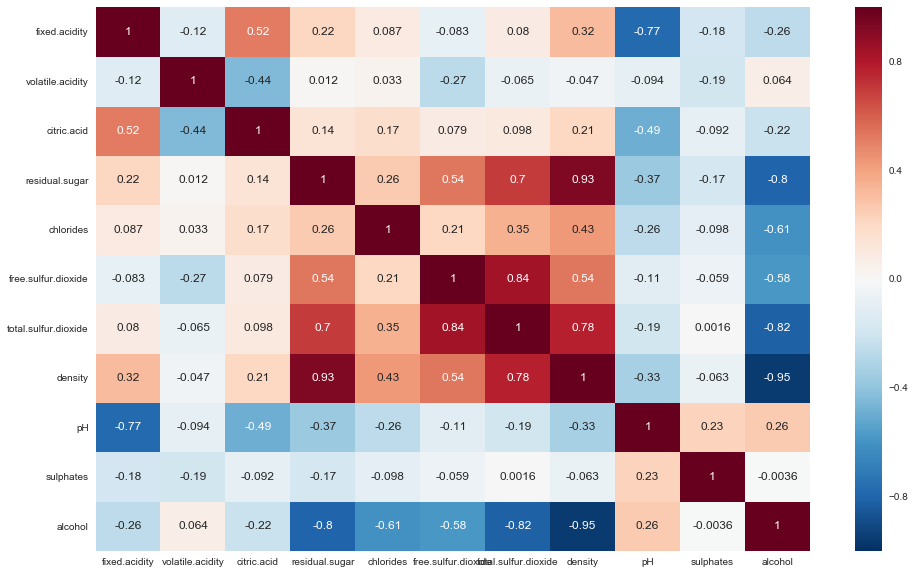

In [24]:
plt.figure(figsize=(16,10))
sns.heatmap(korelacja.corr(), annot=True)
plt.show()

### Zobaczmy charakter zależności między zmiennymi

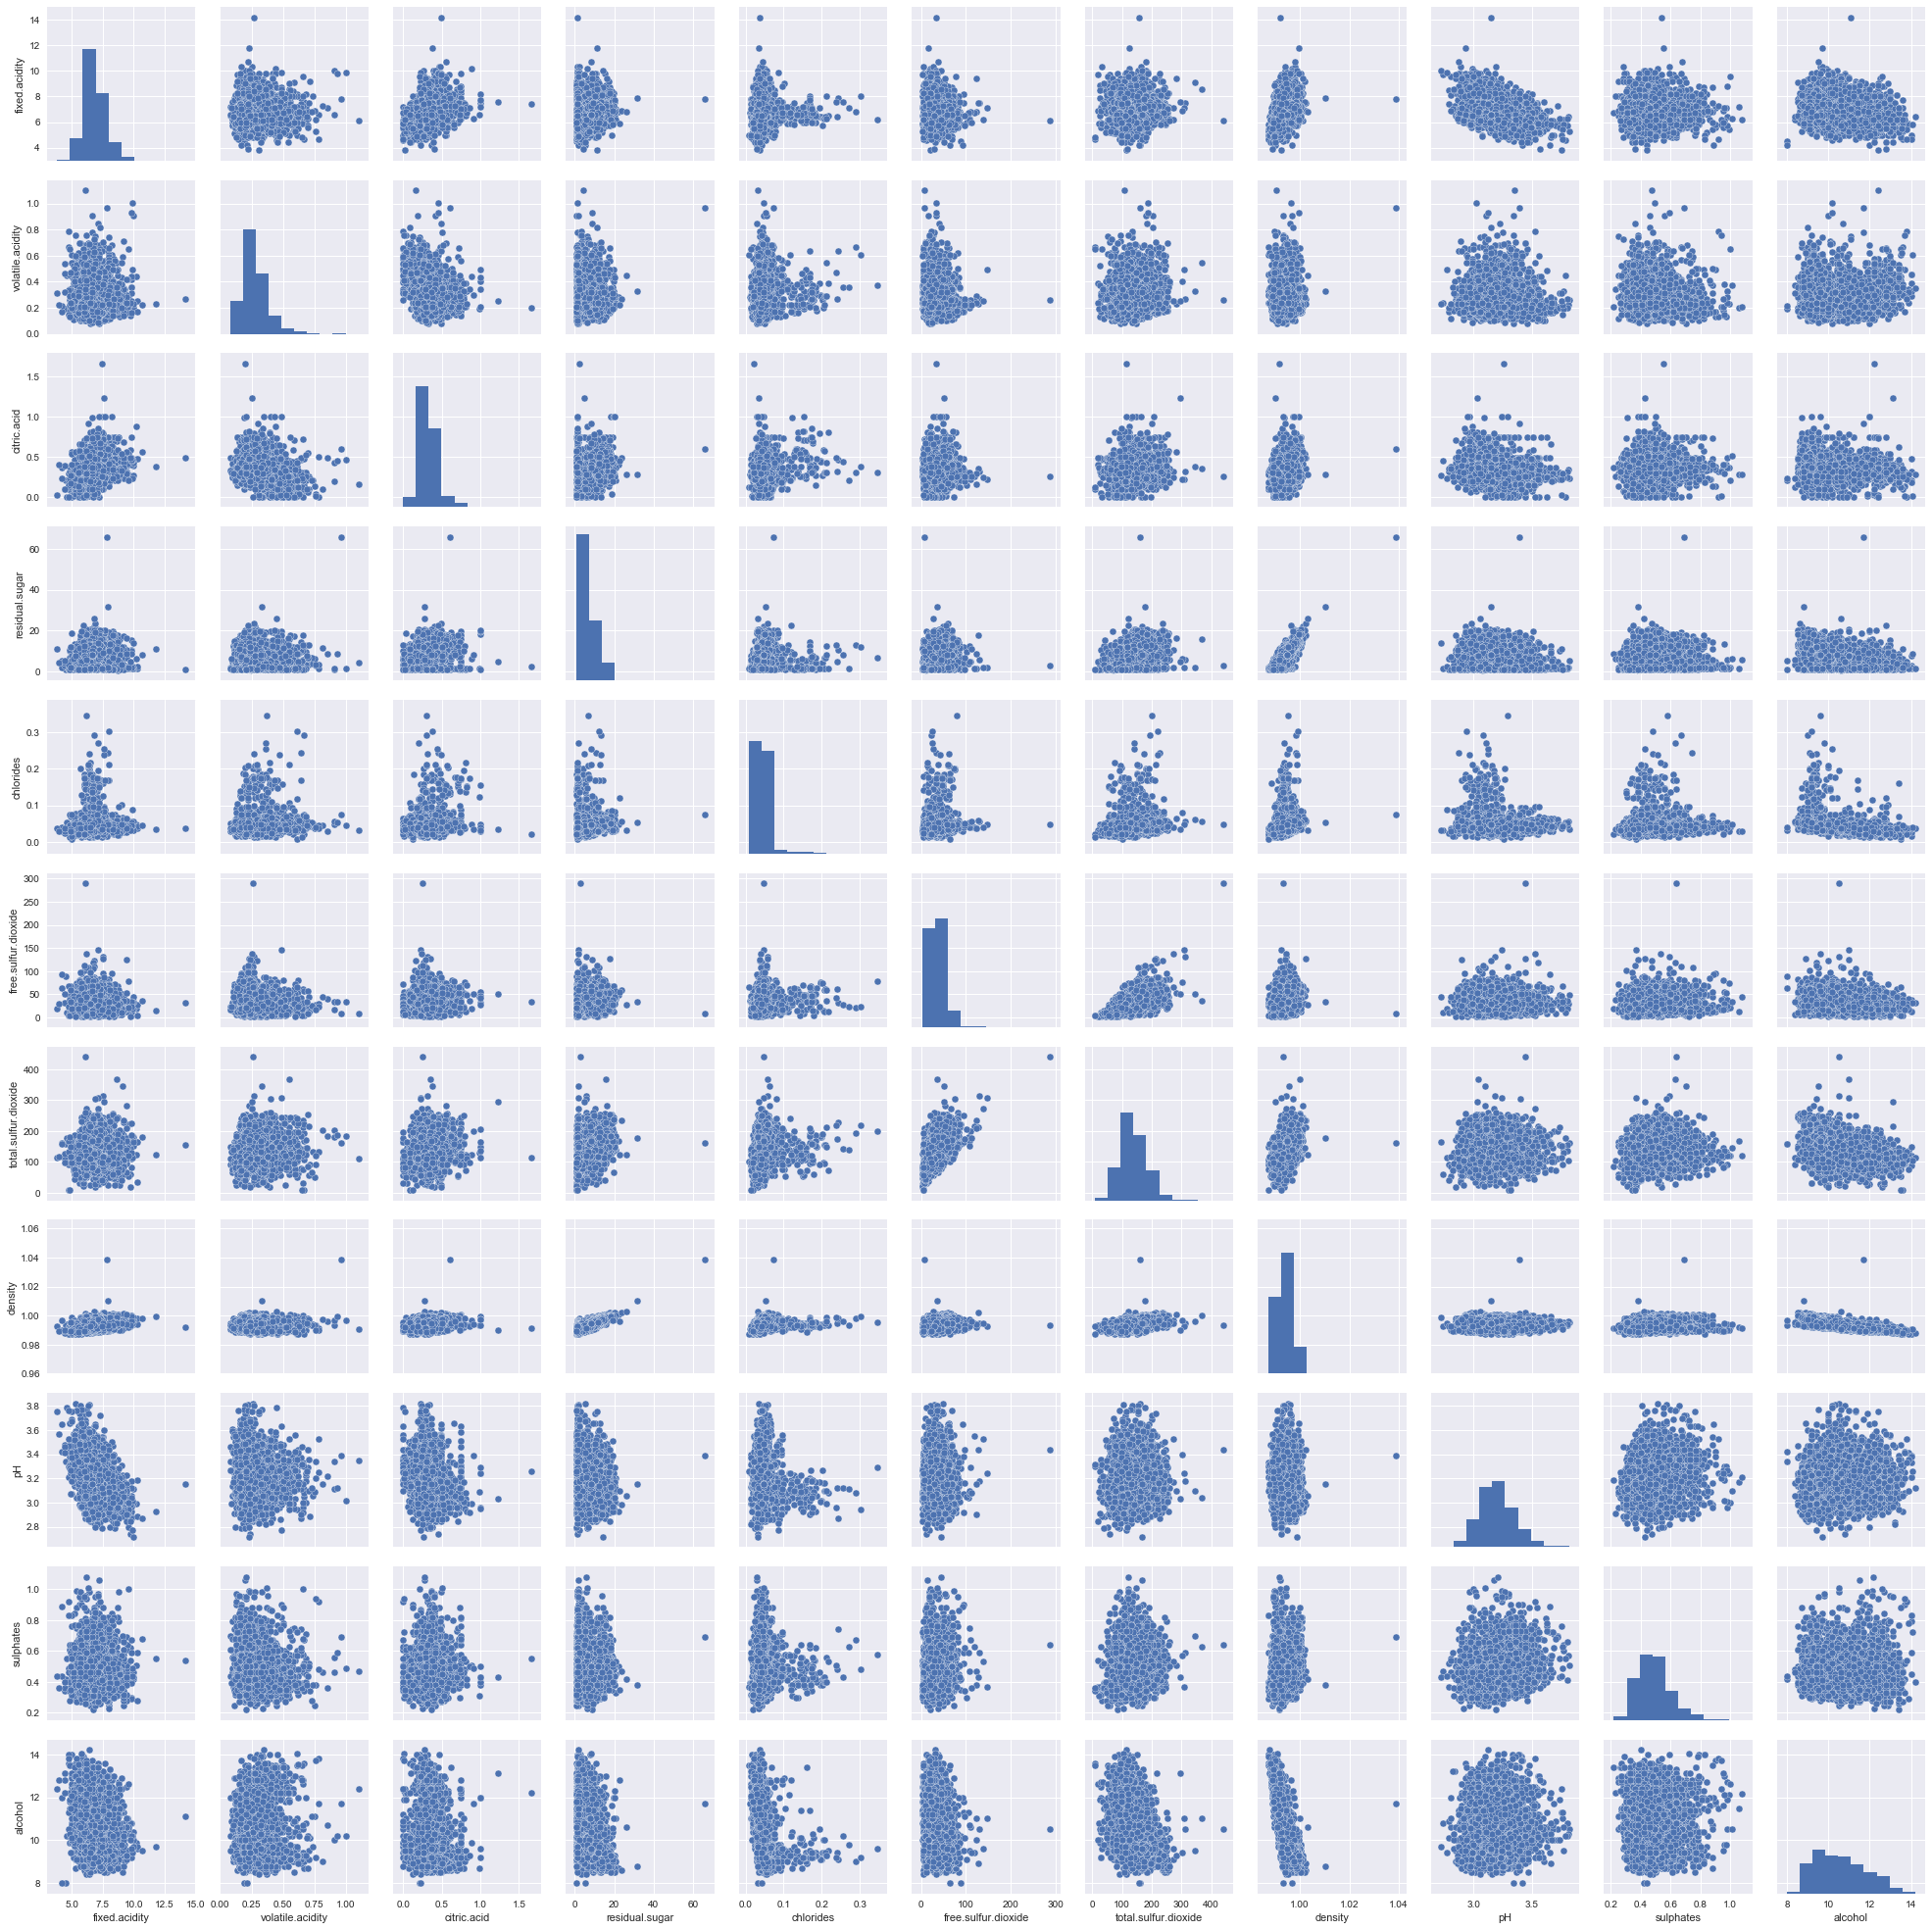

In [26]:
sns.pairplot(wina_b)

### Które pary są skorelowane najsilniej?

In [27]:
korelacja[abs(korelacja)>0.5]

fixed.acidity  volatile.acidity  citric.acid  \
fixed.acidity                   1.0               NaN          NaN   
volatile.acidity                NaN               1.0          NaN   
citric.acid                     NaN               NaN          1.0   
residual.sugar                  NaN               NaN          NaN   
chlorides                       NaN               NaN          NaN   
free.sulfur.dioxide             NaN               NaN          NaN   
total.sulfur.dioxide            NaN               NaN          NaN   
density                         NaN               NaN          NaN   
pH                              NaN               NaN          NaN   
sulphates                       NaN               NaN          NaN   
alcohol                         NaN               NaN          NaN   

                      residual.sugar  chlorides  free.sulfur.dioxide  \
fixed.acidity                    NaN        NaN                  NaN   
volatile.acidity                 NaN        NaN                  NaN   
citric.acid                      NaN        NaN                  NaN   
residual.sugar              1.000000        NaN                  NaN   
chlorides                        NaN        1.0                  NaN   
free.sulfur.dioxide              NaN        NaN             1.000000   
total.sulfur.dioxide             NaN        NaN             0.619437   
density                     0.820498        NaN                  NaN   
pH                               NaN        NaN                  NaN   
sulphates                        NaN        NaN                  NaN   
alcohol                          NaN        NaN                  NaN   

                      total.sulfur.dioxide   density   pH  sulphates   alcohol  
fixed.acidity                          NaN       NaN  NaN        NaN       NaN  
volatile.acidity                       NaN       NaN  NaN        NaN       NaN  
citric.acid                            NaN       NaN  NaN        NaN       NaN  
residual.sugar                         NaN  0.820498  NaN        NaN       NaN  
chlorides                              NaN       NaN  NaN        NaN       NaN  
free.sulfur.dioxide               0.619437       NaN  NaN        NaN       NaN  
total.sulfur.dioxide              1.000000  0.536868  NaN        NaN       NaN  
density                           0.536868  1.000000  NaN        NaN -0.760162  
pH                                     NaN       NaN  1.0        NaN       NaN  
sulphates                              NaN       NaN  NaN        1.0       NaN  
alcohol                                NaN -0.760162  NaN        NaN  1.000000

Widzimy, że jedna kolumna "density" ze zbioru X jest silnie skorelowana (|korelacja| > 0.7) ze zmienną niezależną y.

### Budowanie modelu regresji liniowej
Model regresji liniowej jest obsługiwany przez bibliotekę scikit-learn przy użyciu obiektu klasy LinearRegression, z modułu linear_model.

In [28]:
import sklearn.linear_model
mnk = sklearn.linear_model.LinearRegression()

### Dopasowanie modelu do danych
Użyjemy metodę fit(), aby wyznaczyć parametry modelu

In [29]:
mnk.fit(x,y)     # dopasowujemy model do danych

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

### Wyznaczenie parametrów modelu 
Oszacowane przez sklearn wartości współczynników uzyskamy za pomoca metod intercept_ (punt przecięcia Y) i metody coef_ (współczynniki przy zmiennych niezależnych)

In [30]:
mnk.intercept_     #uzyskamy wyraz wolny z równania linii regresji

680.7090390332952

In [32]:
mnk.coef_           #współczynniki

array([  5.08985834e-01,   8.91433570e-01,   4.16880125e-01,
         2.42749178e-01,  -3.94341133e-01,  -3.33635324e-03,
         2.79786508e-04,  -6.87861040e+02,   2.42818063e+00,
         1.01964556e+00])

### Predykcja zawartości alkoholu

In [33]:
x_prognoza = x.mean().values.reshape(1,-1)    # średnie wino

In [34]:
mnk.predict(x_prognoza)

array([ 10.58935791])

### Ocena jakości dopasowania modelu
Podając metodzie predict() jako argument macierz obserwacji otrzymamy wartości dopasowane (fitted values), oznaczone y "z daszkiem".

In [35]:
y_prognoza = mnk.predict(x)
y_prognoza

array([  8.76177537,   9.46286638,  10.70447049, ...,   9.51639516,
        12.53069571,  11.914465  ])

In [36]:
y_prognoza[0:4]

array([  8.76177537,   9.46286638,  10.70447049,   9.96719912])

In [38]:
y[0:4].values    # dla porównania - wartości referencyjne

array([  8.8,   9.5,  10.1,   9.9])

### Wyznaczenie wsółczynnika determinacji 

Jakość dopasowania modelu do danych uczących można uzyskać na podstawie współczynnika determinacji $$\ R^2$$ Im wartość tego współczynnika jest bliższa 1, tym model lepiej opisuje zmienność y. Wartość jego można wyznaczyć przy użyciu metody score() w klasie LinearRegression

In [40]:
import sklearn.metrics
sklearn.metrics.r2_score(y, y_prognoza)

0.85806561184111474

### Miary błędów dopasowania

Do najpopularniejszych miar określających stopień odchylenia dopasowanego prognozowanego y (z daszkiem) od prawdziwego y zaliczamy:
- MSE - błąd średnokwadratowy (mean squared error)
- MAE - średnią z modułów różnic (mean absolute error)
- MedAE - medianę z modułów różnic (median absolute error)

Zacznijmy od MSE

In [41]:
sklearn.metrics.mean_squared_error(y,y_prognoza)

0.21019074651654598

Teraz MAE

In [42]:
sklearn.metrics.mean_absolute_error(y, y_prognoza)

0.30140201967066882

Teraz MedAE

In [43]:
sklearn.metrics.median_absolute_error(y, y_prognoza)

0.24887712240304083

**Jest to uproszczona wersja analizy regresji, którą można wykonać na powyższym zbiorze. Przykład pokazuje, że środowisko języka Python obsługuje cały cykl modeli predykcyjnych, wykorzystując do tego celu bogate fukcjonalnie biblioteki**  